In [130]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from scipy.stats.stats import pearsonr
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle

# Classification modules
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import ColorbarBase

%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Clustering Assigment

In [6]:
cluster_data = pd.read_pickle('cluster1.pkl')

In [12]:
cluster_data

array([[ -9.73563640e+00,  -6.75873801e+00,  -9.15647093e+00],
       [  1.17821951e+01,   1.89352041e+00,  -5.38858894e+00],
       [ -5.53399172e+00,  -9.15304527e-01,  -2.48403910e+00],
       [  1.36280422e+01,   1.93918855e+00,  -6.30123476e+00],
       [  1.16196894e+01,   1.28493343e+00,  -1.91459859e+00],
       [  7.33611609e+00,   7.43022853e-01,  -5.73722613e+00],
       [ -8.81504733e+00,  -4.17775341e+00,   1.51386078e+00],
       [ -5.72965876e+00,  -3.15276576e+00,  -2.61290154e+00],
       [  8.88169855e+00,  -2.72427031e-01,  -4.64388752e+00],
       [ -7.70890401e+00,  -3.85302196e+00,   1.99425979e-02],
       [ -9.38608004e+00,  -6.49444353e+00,  -8.73841068e+00],
       [ -1.22395198e+01,  -4.78080934e+00,  -8.76157437e+00],
       [ -9.43539295e+00,  -2.24347272e+00,  -1.70928180e-01],
       [  1.21542253e+01,   1.11676884e+00,  -6.52458520e+00],
       [  8.81706313e+00,  -6.13984577e-01,  -4.56217695e+00],
       [  1.23326054e+01,  -2.76895922e+00,  -3.4045884

In [63]:
pearsonr(cluster_data[:,0],cluster_data[:,1])

(0.61890212427888003, 4.1577194370075458e-33)

In [67]:
# data_X = cluster_data[:,(0,2)]
# data_y = cluster_data[:,1]

In [96]:
data_X_scl = scale(data_X)

In [98]:
pca = PCA()
X = pca.fit_transform(cluster_data)
print(pca.explained_variance_ratio_)

[ 0.81862622  0.15217812  0.02919566]


In [86]:
km = KMeans(n_clusters=20)

In [99]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [100]:
mu_data = km.cluster_centers_

In [110]:
Inertia = []
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=10, max_iter=1000)
    km.fit(X)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    Inertia.append(km.inertia_)

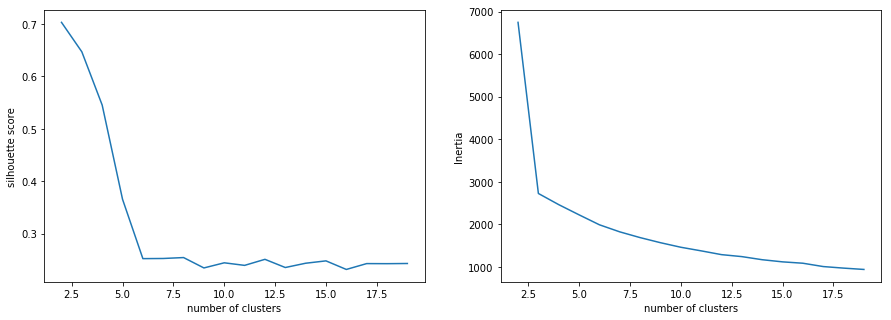

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette score')

# plot here on ax2
ax2.plot(k_clusters, Inertia)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('Inertia');

In [112]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [113]:
mu_data = km.cluster_centers_

In [121]:
list(km.labels_).count(0)

200

## Classification Assigment

In [124]:
class_data = pd.read_pickle('classification.pkl')

In [125]:
class_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.094176,1.311481,0.669518,0.462130,0.924826,0.320199,0.500238,-1.141416,0.946244,0.134583,...,-0.210488,-0.688082,-0.198602,-0.389638,0.847061,1.147521,-1.248303,0.819974,0.684105,1
1,0.039309,-0.282793,0.091440,0.348772,-1.222226,-1.270123,0.565200,0.654688,-1.243673,1.190361,...,-0.291332,0.636953,0.464488,0.815605,0.277057,0.274514,0.879307,-0.182923,0.470393,1
2,-0.566671,-0.865299,-1.869118,-0.708375,-1.363103,-1.322028,0.346960,-2.391982,0.693698,0.442282,...,0.160562,0.724428,1.359291,0.388840,-1.174396,0.287220,-0.152500,-1.979320,0.563817,0
3,0.229075,-2.189922,0.103816,-0.662714,0.346710,-0.630887,0.958386,1.194592,-0.032281,-0.756764,...,-1.299216,0.640543,0.123078,2.162666,-1.839366,2.511557,0.051661,-1.840078,0.232787,0
4,0.660343,-1.007195,1.097985,0.978973,1.396760,0.201980,-2.161304,0.168231,-0.161767,0.479940,...,-0.331865,0.330867,0.749767,-0.728429,1.780035,0.444968,0.482534,0.031063,0.324782,1
5,1.519336,0.283131,0.490246,0.408044,-0.456992,1.022721,-2.476792,-0.102056,1.055694,-0.168785,...,1.212091,-1.097144,-0.622672,-1.290933,1.084632,-1.408227,0.501090,0.077079,-1.493190,1
6,0.536414,0.728941,-0.318622,-0.568220,-0.014270,-0.573794,-0.659039,-0.692351,0.436006,0.479508,...,-1.582223,0.843840,0.392634,1.348115,-1.375592,0.149598,-0.574101,0.097827,0.050228,0
7,0.170705,-0.734320,0.588743,0.525738,-0.516768,1.991669,0.706521,-1.600189,-0.686880,-0.172031,...,-1.446883,-1.026035,-0.108586,-2.460491,1.678398,0.276994,-0.171171,1.703727,1.453634,1
8,-0.754866,0.476240,1.348489,0.879097,-1.770481,-2.492785,-0.993593,2.529928,-0.636224,0.092055,...,2.441222,-0.565060,1.871074,2.764860,0.382793,-0.578113,-1.120418,-0.258009,0.437127,1
9,0.403170,0.698575,0.048004,0.386455,-1.799357,0.677586,-0.064422,0.848805,-0.560557,-0.617299,...,-0.306773,1.694176,-0.690337,-1.456839,1.134327,0.826584,-1.359968,1.374798,-0.306996,1


In [131]:
X = class_data.drop(['target'], axis=1)
y = class_data['target']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [134]:
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [135]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train_std, y_train, cv=10, scoring="f1")
print(knn_score)

[ 0.86206897  0.83636364  0.80701754  0.9122807   0.8852459   0.87272727
  0.88461538  0.84615385  0.84615385  0.8627451 ]


In [136]:
# LinearSVM
svm = LinearSVC()
svm_acc = cross_val_score(svm, X_train_std, y_train, cv=10, scoring="f1")
print(svm_acc)

[ 0.93333333  0.85714286  0.86206897  0.93333333  0.91803279  0.92857143
  0.90909091  0.85714286  0.88        0.92857143]


In [137]:
# Logistic Regression
logreg = LogisticRegression()
log_acc = cross_val_score(logreg, X_train_std, y_train, cv=10, scoring="f1")
print(log_acc)

[ 0.93333333  0.86206897  0.87719298  0.91803279  0.91803279  0.9122807
  0.90909091  0.85714286  0.88        0.94736842]


In [138]:
# Gaussian Naive Bayes
gauss = GaussianNB()
gauss_acc = cross_val_score(gauss, X_train, y_train, cv=10, scoring='f1')
print(gauss_acc)

[ 0.93333333  0.88135593  0.88135593  0.90322581  0.91803279  0.94736842
  0.93103448  0.94915254  0.90566038  0.92857143]


In [140]:
# Random Forests
forest = RandomForestClassifier()
forest_acc = cross_val_score(forest, X_train, y_train, cv=10, scoring='f1')
print(forest_acc)

[ 0.94915254  0.89285714  0.92857143  0.91803279  0.94736842  0.92857143
  0.94545455  0.92857143  0.88888889  0.90909091]
